<a href="https://www.kaggle.com/code/fotimakhongulomova/backpropagation-and-gradient-descent?scriptVersionId=159487530" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Notebook Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Preload the Dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## Building the Neural Network

In [4]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

## Building the Model 

In [5]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

## Training and evaluating the model

In [6]:
model_history = model.fit(X_train_full, y_train_full, epochs=40)

Epoch 1/40
1875/1875 [==============================] - 8s 3ms/step - loss: 0.5563 - accuracy: 0.8076
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4101 - accuracy: 0.8535
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3667 - accuracy: 0.8677
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3396 - accuracy: 0.8780
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3226 - accuracy: 0.8838
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3061 - accuracy: 0.8886
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2916 - accuracy: 0.8937
Epoch 8/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2822 - accuracy: 0.8979
Epoch 9/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2672 - accuracy: 0.9030
Epoch 10/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.259

## Visualization of Model

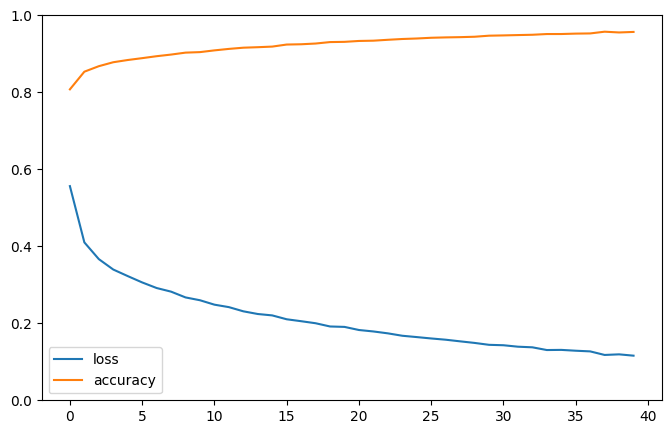

In [7]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.gca().set_ylim(0, 1) 
plt.show()